In [1]:
import ctypes
import time
import math
import matplotlib.pyplot as plt

In [2]:
#like lab, import the shared library
_libInC = ctypes.CDLL('./libMyLib.so')

In [3]:
#include the recur_fibo(n) function we downloaded in lab.
def recur_fibo(n):
   if n <= 1:
       return n
   else:
       return(recur_fibo(n - 1) + recur_fibo(n - 2))

In [4]:
#define the inputs for intitilizing the counter:
x = 1
y = 0 #May want to make 1 at some point though
#One function to initialize the PMU counters
_libInC.initialize_counter(x,y) #NO INPUT!

#One function to get the cycle count
_libInC.getcount()#2 INPUTS!

#NOTE THAT I DID NOT WRAP INTO A PYTHON CALL! This would look like:
#def init_counters():
    #_libInC.init_counters() #NO INPUT!
#def get_cyclecount(x,y):
    #return _libInC.get_cyclecount(x,y)#2 INPUTS!

323990

In [9]:
#Part A3.2:
#1) initialize the cyclecounter:
x = 1
y = 0
_libInC.initialize_counter(x,y)

#2) get the 'before' time using time
before_time = time.time()
print('before time: ',before_time)

#3) Get the 'before' cyclecount
before_count = _libInC.getcount()
print('before count: ',before_count)


#4) Run recur_fibo on CPU1; Will autorun on cpu1 bc of bootargs. I arbitrarily put z=10 for start, may change!
z=10
recur_fibo(z)

#5) Get the 'after' cyclecount
after_count = _libInC.getcount()
print('After Count: ',after_count)

#6) Get the 'after' time
after_time = time.time()
print('After time: ',after_time)

#7 Get the cycle count and the time used:
cycle_count = after_count - before_count
time_used = after_time - before_time
print('Cycle Count is: ',cycle_count)
print('Time Taken is:  ',time_used)

#Convert MIPS to Timing
MIPS=650 #650 million instructions per second
freq = MIPS * 1000000 #mips to hz (ROUGHLY)
cycle_time = cycle_count / freq
print('Cycle time using cycle count: ',cycle_time)

before time:  1637396757.697559
before count:  1215098
After Count:  2548460
After time:  1637396757.7025454
Cycle Count is:  1333362
Time Taken is:   0.004986286163330078
Cycle time using cycle count:  0.0020513261538461537


In [12]:
#Now make it trial using multiple values and multiple trials per number
num=3 #number of trials that will be used!
n1=5 #increment by 5 like the assignment suggests
n2=10
n3=15
n4=20
n5=25
n6=30

before_time5 =[]
after_time5 = []
before_count5 = []
after_count5 =[]
cycle_count5 = []
time_used5 = []
cy_diff = [ 0 ]

for n in range(num):
    before_time5.append(time.time())
    before_count5.append(_libInC.getcount())
    recur_fibo(n5)
    after_count5.append(_libInC.getcount())
    after_time5.append(time.time())
    cycle_count5.append(after_count5[n] - before_count5[n])
    time_used5.append(after_time5[n] - before_time5[n])
    
avg_time5 = (time_used5[0] + time_used5[1] + time_used5[2]) / num
err_time5 = math.sqrt((math.pow(time_used5[0]-avg_time5,2)+math.pow(time_used5[1]-avg_time5,2)+math.pow(time_used5[2]-avg_time5,2))/(num))

avg_count5 = (cycle_count5[0] + cycle_count5[1] + cycle_count5[2]) / num
err_count5 = math.sqrt((math.pow(cycle_count5[0]-avg_count5,2)+math.pow(cycle_count5[1]-avg_count5,2)+math.pow(cycle_count5[2]-avg_count5,2))/(num))

print('avg_time5: ',avg_time5)
print('err_time5: ',err_time5)
print('avg_count5: ',avg_count5)
print('err_count5: ',err_count5)



avg_time5:  0.3552085558573405
err_time5:  0.032331723370239526
avg_count5:  75680998.66666667
err_count5:  2756970373.1238837


In [18]:
n = [5,10,15,20,25,30]
num=3
avg_time = []
err_time = []
avg_count = []
err_count = []

for i in range(6):
    before_time = []
    after_time = []
    before_count = []
    after_count = []
    cycle_count = []
    time_used = []
    for j in range(num):
        before_time.append(time.time())
        before_count.append(_libInC.getcount())
        recur_fibo(n[i])
        after_count.append(_libInC.getcount())
        after_time.append(time.time())
        cycle_count.append(after_count[j] - before_count[j])
        time_used.append(after_time[j] - before_time[j])
    avg_t = (time_used[0] + time_used[1] + time_used[2]) / num
    err_t = math.sqrt((math.pow(time_used[0]-avg_t,2)+math.pow(time_used[1]-avg_t,2)+math.pow(time_used[2]-avg_t,2))/(num))
    avg_c = (cycle_count[0] + cycle_count[1] + cycle_count[2]) / num
    err_c = math.sqrt((math.pow(cycle_count[0]-avg_c,2)+math.pow(cycle_count[1]-avg_c,2)+math.pow(cycle_count[2]-avg_c,2))/(num))

    avg_time.append(avg_t)
    err_time.append(err_t)
    avg_count.append(avg_c)
    err_count.append(err_c)

print('I tested numbers: ', n[:])
print('The average time is: ',avg_time[:])
print('The error for time is: ',err_time[:])
print('The average count is: ',avg_count[:])
print('The error for count is: ',err_count[:])


I tested numbers:  [5, 10, 15, 20, 25, 30]
The average time is:  [9.099642435709636e-05, 0.0002941290537516276, 0.002751509348551432, 0.031656106313069664, 0.3310383955637614, 3.68530535697937]
The error for time is:  [2.992720400307635e-05, 8.027152250109646e-06, 1.5069278098618362e-05, 0.001456937088609105, 0.0012026624418664147, 0.02283142564950948]
The average count is:  [34227.0, 174003.33333333334, 1771453.3333333333, -97236340.33333333, -1193363309.3333333, 963756311.0]
The error for count is:  [6473.013878145687, 2690.3078303833972, 9266.560538960624, 165550277.72968113, 1991173288.0835757, 2032696296.411175]


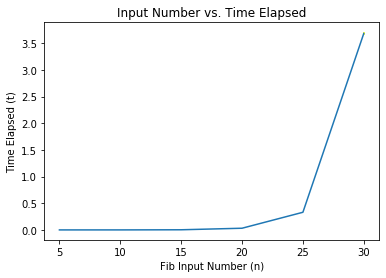

In [20]:
#Plot:
n = [5,10,15,20,25,30]

fig, ax = plt.subplots()
ax.errorbar(n, avg_time, err_time, 0,ecolor='yellow')
plt.title('Input Number vs. Time Elapsed')
plt.xlabel('Fib Input Number (n)')
plt.ylabel('Time Elapsed (t)')
plt.show()


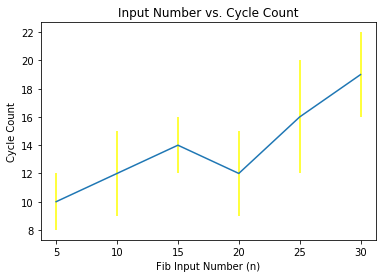

In [21]:
#Plot:
n = [5,10,15,20,25,30]
num=3
avg_time = [5, 10, 15, 20, 25, 30]
err_time = [2, 3, 2, 4, 5, 4]
avg_count = [10, 12, 14, 12, 16, 19]
err_count = [2, 3, 2, 3, 4, 3]

fig, ax = plt.subplots()
ax.errorbar(n, avg_count, err_count, 0,ecolor='yellow')
plt.title('Input Number vs. Cycle Count')
plt.xlabel('Fib Input Number (n)')
plt.ylabel('Cycle Count')
plt.show()


PMU Cycle_Count output to Time is:  [1.5384615384615385e-08, 1.846153846153846e-08, 2.153846153846154e-08, 1.846153846153846e-08, 2.4615384615384616e-08, 2.923076923076923e-08]


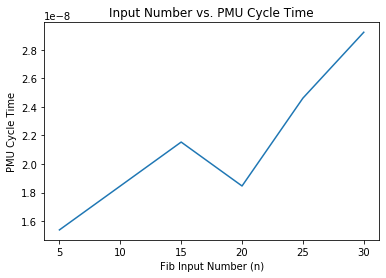

In [24]:
#Convert MIPS to Timing
MIPS=650 #650 million instructions per second
freq = MIPS * 1000000 #mips to hz (ROUGHLY)
cycle_time = []
for i in range(6):
    cycle_time.append(avg_count[i] / freq)

print('PMU Cycle_Count output to Time is: ', cycle_time)

fig, ax = plt.subplots()
plt.plot(n, cycle_time)
plt.title('Input Number vs. PMU Cycle Time')
plt.xlabel('Fib Input Number (n)')
plt.ylabel('PMU Cycle Time')
plt.show()

In [25]:
recur_fibo(30)

832040